# Benchmarking promor
#### Author: Chathurani Ranathunge

###  *Data*
Cox et al., 2014 data set (PXD000279) downloaded from the PRIDE archive

In [145]:
#Load ggVennDiagram
library(ggVennDiagram)
#Load ggplot2
library(ggplot2)
#Load viridis
library(viridis)

Loading required package: viridisLite



In [1]:
#Load promor
library(promor)

## 1. Data analysis using promor
### *Create a raw_df object*

In [2]:
#Create a raw_df object with proteinGroups.txt and exp_design file 
raw_df <- create_df(prot_groups = "https://raw.githubusercontent.com/caranathunge/promor_example_data/main/PXD000279_proteinGroups.txt", 
                    exp_design = "https://raw.githubusercontent.com/caranathunge/promor_example_data/main/PXD000279_expDesign.txt",
                   uniq_pep = 1)

0 empty rows removed.

0 empty columns removed.

80 proteins (rows) only identified by site removed.

65 reverse proteins (rows) removed.

961 proteins identified by less than 1 unique peptides removed.



### *Filter out proteins with higher than 34% missing data in at least one group (in other words - requires 67% valid data in each group to retain the protein)*

In [3]:
raw_df_filt <- filterbygroup_na(raw_df, set_na = 0.34)

685 proteins with higher than 34% NAs in at least one group removed.



### *Impute missing data with the default MinProb method*

In [4]:
imp_df <- impute_na(raw_df_filt)

### *Normalize data with the quantile method*

In [5]:
norm_df <- normalize_data(imp_df)

### *Find significantly differentially expressed proteins*
Default: adjusted p-value cutoff = 0.05 (Benjamini Hochberg method)

In [8]:
fit_df <- find_dep(norm_df)

Warning message:
“3 very small variances detected, have been offset away from zero”
1259 siginificantly differentially expressed proteins found.



                                                majority_protein_id     logFC
1                                                            P04406  1.112177
2                                     O43390;O43390-2;Q2L7G6;E7ETM7  1.145030
3  P07355;P07355-2;H0YN42;H0YMD0;H0YMU9;H0YM50;A6NMY6;H0YKS4;B3KRQ1  1.258902
6                                              P04075;H3BQN4;H3BPS8  1.096156
9                                              B7Z4V2;P38646;F5H3L8  1.228933
15                                                           P0ADU2 -1.773315
17                                                           P00864 -1.169896
18                                                           O00299  1.195239
20                                           P07900;P07900-2;Q86U12  1.051456
21                                                           P0ACA3 -1.171971
23                                                           P07913 -1.688112
26                                                           P07

In [16]:
#Lets save the results for the 1259 DE proteins identified
fit_df <- find_dep(norm_df, n_top = 1259, save_tophits = TRUE)

Warning message:
“3 very small variances detected, have been offset away from zero”
1259 siginificantly differentially expressed proteins found.



                                                                                                                                                                                                                                                                                                                           majority_protein_id
1                                                                                                                                                                                                                                                                                                                                       P04406
2                                                                                                                                                                                                                                                                                                                O43390;O43390-2;Q2L7G6;E7

In [17]:
#Upload the TopHits
de_promor <- read.csv("./TopHits.txt", sep = "\t")

In [21]:
#Quick look at what the header looks like
head(de_promor)


,majority_protein_id,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P04406,1.112177,35.50640,22.54645,1.518250e-08,4.909168e-05,10.327174
2,O43390;O43390-2;Q2L7G6;E7ETM7,1.145030,32.55954,19.39280,4.988949e-08,4.909168e-05,9.275503
3,P07355;P07355-2;H0YN42;H0YMD0;H0YMU9;H0YM50;A6NMY6;H0YKS4;B3KRQ1,1.258902,32.40417,18.60068,6.926749e-08,4.909168e-05,8.974406
6,P04075;H3BQN4;H3BPS8,1.096156,32.93207,17.56585,1.085801e-07,4.909168e-05,8.555033
9,B7Z4V2;P38646;F5H3L8,1.228933,32.20210,17.14769,1.311505e-07,4.909168e-05,8.376575
15,P0ADU2,-1.773315,27.75469,-16.08403,2.164212e-07,4.909168e-05,7.897216


In [22]:
#Check the number of DE proteins
nrow(de_promor)

[1] 1259

## 2. Data analysis with LFQ-Analyst
**Input data**
1. proteinGroups.txt file: https://raw.githubusercontent.com/caranathunge/promor_example_data/main/PXD000279_proteinGroups.txt 
2. lfq-analyst experimental design file: https://raw.githubusercontent.com/caranathunge/promor_example_data/main/benchmarking/PXD000279_lfqanalyst_expdesign.txt

**Parameters used:**
1. Adjusted p-value cutoff = 0.05
2. Log-2-fold change cutoff = 1
3. Imputation type : MinProb method
4. Type of FDR correction: Benjamini Hochberg method

**Results**
* LFQ-Analyst identified **1409** significantly differentially expressed proteins between H and L conditions
* Complete results from the DE analysis were saved as: "https://raw.githubusercontent.com/caranathunge/promor_example_data/main/benchmarking/PXD000279_lfqanalyst_results.csv"


### *Upload the 'Results.csv' file from running LFQ-Analyst*

In [24]:
lfq_analyst_results <- read.csv("https://raw.githubusercontent.com/caranathunge/promor_example_data/main/benchmarking/PXD000279_lfqanalyst_results.csv")

In [27]:
#Quick look at the results file
head(lfq_analyst_results)

,Gene.Name,Protein.IDs,H_vs_L_log2.fold.change,H_vs_L_p.val,H_vs_L_p.adj,significant,H_vs_L_significant,imputed,num_NAs,Protein.names
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<int>,<chr>
1,aas,P31119,1.14,6.98e-03,0.01780,TRUE,TRUE,TRUE,2,Bifunctional protein aas;2-acylglycerophosphoethanolamine acyltransferase;Acyl-[acyl-carrier-protein] synthetase
2,ACBD6,Q9BR61,-1.36,4.32e-03,0.01270,TRUE,TRUE,TRUE,1,Acyl-CoA-binding domain-containing protein 6
3,accA,P0ABD5,1.36,4.74e-05,0.00125,TRUE,TRUE,FALSE,0,Acetyl-coenzyme A carboxylase carboxyl transferase subunit alpha
4,accB,P0ABD8,1.14,1.37e-03,0.00584,TRUE,TRUE,FALSE,0,Biotin carboxyl carrier protein of acetyl-CoA carboxylase
5,accC,P24182,1.22,5.58e-05,0.00125,TRUE,TRUE,FALSE,0,Biotin carboxylase
6,accD,P0A9Q5,1.26,9.91e-05,0.00138,TRUE,TRUE,FALSE,0,Acetyl-coenzyme A carboxylase carboxyl transferase subunit beta


### *Extract DE proteins from the data frame*

In [38]:
#Reduce the data frame to significant hits and limit the data frame to only those columns we need
de_lfq_analyst <- lfq_analyst_results[lfq_analyst_results$significant == 'TRUE',c("Protein.IDs", 
                                                                                 "H_vs_L_p.val",
                                                                                 "H_vs_L_log2.fold.change")]

In [ ]:
#Check if the 1409 DE proteins were extracted
nrow(de_lfq_analyst)

In [43]:
#Check header
head(de_lfq_analyst, n = 2)

,Protein.IDs,H_vs_L_p.val,H_vs_L_log2.fold.change
,<chr>,<dbl>,<dbl>
1,P31119,0.00698,1.14
2,Q9BR61,0.00432,-1.36


In [44]:
#Add a new column with the name of the method used
de_lfq_analyst$method <- "LFQ-Analyst"

In [46]:
#Check header
head(de_lfq_analyst, n = 2)

,Protein.IDs,H_vs_L_p.val,H_vs_L_log2.fold.change,method
,<chr>,<dbl>,<dbl>,<chr>
1,P31119,0.00698,1.14,LFQ-Analyst
2,Q9BR61,0.00432,-1.36,LFQ-Analyst


## 3. Compare results from promor and LFQ-Analyst

In [36]:
#Add a Protein.IDs column to promor results by extracting the first protein from majority_protein_ids
de_promor$Protein.IDs <- sapply(strsplit(as.character(de_promor$majority_protein_id),';'), "[", 1)

In [37]:
#Check the data frame - rightmost column
head(de_promor)

,majority_protein_id,logFC,AveExpr,t,P.Value,adj.P.Val,B,Protein.IDs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,P04406,1.112177,35.50640,22.54645,1.518250e-08,4.909168e-05,10.327174,P04406
2,O43390;O43390-2;Q2L7G6;E7ETM7,1.145030,32.55954,19.39280,4.988949e-08,4.909168e-05,9.275503,O43390
3,P07355;P07355-2;H0YN42;H0YMD0;H0YMU9;H0YM50;A6NMY6;H0YKS4;B3KRQ1,1.258902,32.40417,18.60068,6.926749e-08,4.909168e-05,8.974406,P07355
6,P04075;H3BQN4;H3BPS8,1.096156,32.93207,17.56585,1.085801e-07,4.909168e-05,8.555033,P04075
9,B7Z4V2;P38646;F5H3L8,1.228933,32.20210,17.14769,1.311505e-07,4.909168e-05,8.376575,B7Z4V2
15,P0ADU2,-1.773315,27.75469,-16.08403,2.164212e-07,4.909168e-05,7.897216,P0ADU2


In [41]:
#Extract only those columns we need from de_promor
de_promor <- de_promor[,c("Protein.IDs","P.Value","logFC" )]

In [42]:
#Check the new data frame 
head(de_promor, n = 2)

,Protein.IDs,P.Value,logFC
,<chr>,<dbl>,<dbl>
1,P04406,1.518250e-08,1.112177
2,O43390,4.988949e-08,1.145030


In [47]:
#Add a new column with the method information
de_promor$method <- "promor"

In [48]:
#Check header
head(de_promor, n = 2)

,Protein.IDs,P.Value,logFC,method
,<chr>,<dbl>,<dbl>,<chr>
1,P04406,1.518250e-08,1.112177,promor
2,O43390,4.988949e-08,1.145030,promor


In [51]:
#Let's give both data frames similar column names
colnames(de_lfq_analyst) <- c("protein", "p_value", "log_fc", "method")
colnames(de_promor) <- c("protein", "p_value", "log_fc", "method")
#Check headers
head(de_promor, n = 2)
head(de_lfq_analyst, n = 2)


,protein,p_value,log_fc,method
,<chr>,<dbl>,<dbl>,<chr>
1,P04406,1.518250e-08,1.112177,promor
2,O43390,4.988949e-08,1.145030,promor


,protein,p_value,log_fc,method
,<chr>,<dbl>,<dbl>,<chr>
1,P31119,0.00698,1.14,LFQ-Analyst
2,Q9BR61,0.00432,-1.36,LFQ-Analyst


In [136]:
#Make a list object to build a venn diagram with ggVennDiagram
de_promor_prot <- de_promor$protein
de_lfq_analyst_prot <- de_lfq_analyst$protein

venn_data <- list(promor = de_promor_prot,
                 LFQ_Analyst = de_lfq_analyst_prot)

### *Build a Venn Diagram*

In [175]:
?ggVennDiagram

In [186]:
venn <- Venn(venn_data)
data <- process_data(venn)
venn_diagram <- ggVennDiagram(venn_data, 
                              category.names = c("promor","LFQ-Analyst"),   
                              set_size = 7,
                             )
venn_diagram <- venn_diagram  +
  # 1. region count layer
geom_sf(aes(fill = count), data = venn_region(data)) +
  # 2. set edge layer
geom_sf(color = "grey50", size = 0.8, data = venn_setedge(data), show.legend = FALSE) + 
  # 3. set label layer
#geom_sf_text(aes(label = name), data = venn_setlabel(data), size = 8, nudge_y = 0.5) +
  # 4. region label layer
geom_sf_label(aes(label = count),  data = venn_region(data), size = 8, alpha = 0.9, color = "grey10") +
theme_void()+
theme(legend.title = element_text(size = 15, face = "bold"))+
labs(fill = "Count")+
scale_fill_viridis(option = "mako", direction = -1, begin = 0.4, discrete = FALSE, alpha = 0.9)

In [187]:
ggsave(venn_diagram, filename = "promor_v_lfq-analyst.png", device = "png")

Saving 7 x 7 in image



### *Compare P-values*

In [202]:
#Combine data from the two methods
plot_data <- merge(de_promor, de_lfq_analyst, by = "protein",all = FALSE)

In [203]:
head(plot_data, n =2)

,protein,p_value.x,log_fc.x,method.x,p_value.y,log_fc.y,method.y
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,A3KMH1-2,4.534612e-03,1.024708,promor,0.009540,-1.06,LFQ-Analyst
2,A8MUB1,8.055247e-07,1.273269,promor,0.000161,-1.11,LFQ-Analyst


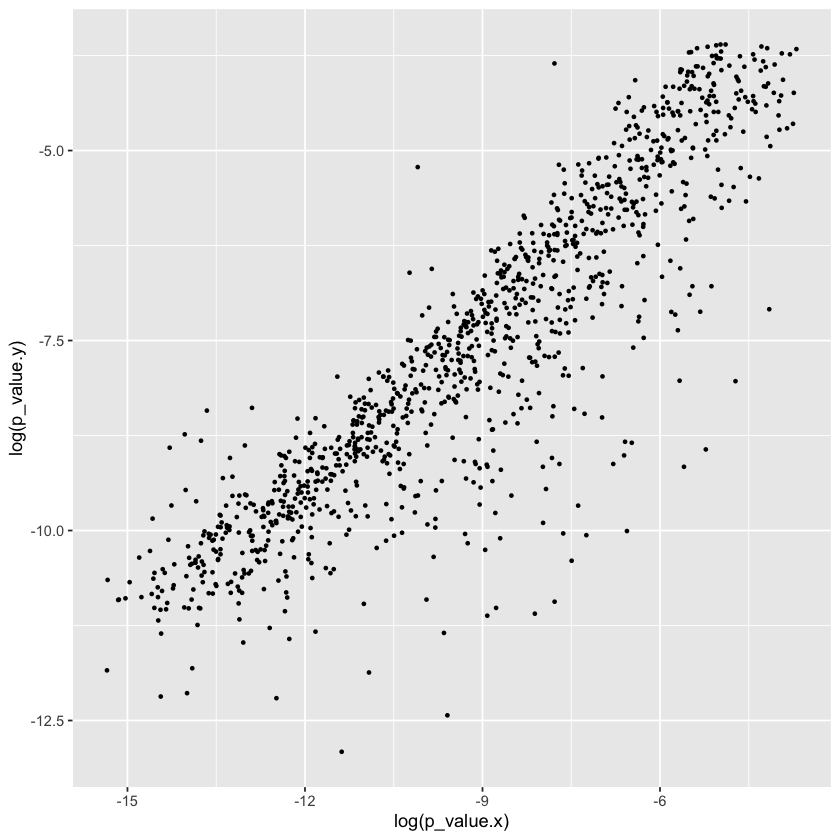

In [220]:
ggplot(plot_data, aes(x= log(p_value.x), y = log(p_value.y))) +
  geom_point(size=1, shape=16)

### *Compare log fold change values*

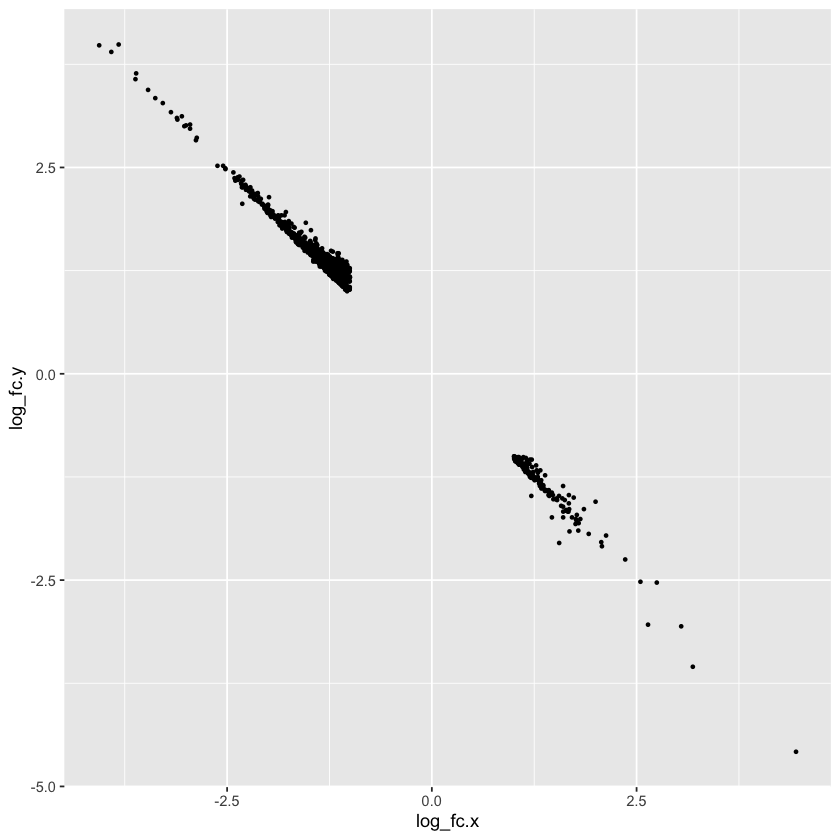

In [217]:
ggplot(plot_data, aes(x= log_fc.x, y = log_fc.y)) +
  geom_point(size=1, shape=16)

#ADD THE FULL DATA SET!!